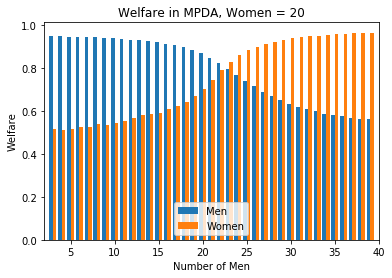

In [16]:
import numpy as np
import math
import random
import copy
from pandas import *
from matplotlib import pyplot as plt

def generate_values(number_men, number_women):

    men_values = [[random.uniform(0,1) for i in range(number_women)] for j in range(number_men)]
    women_values = [[random.uniform(0,1) for i in range(number_men)] for j in range(number_women)]

    return men_values, women_values

def deferred_acceptance(copy_men_values, women_values):
    
    men_values = copy_men_values
    matches = {}
    for i in range(len(women_values)):
        matches[i] = []
    iter=0
    while iter < len(men_values):
        men_temp_max_choices = [-1 for i in range(len(men_values))]
        women_temp_max_choices = [-1 for i in range(len(women_values))]
        for i in range(len(men_values)):
            temp_max_value = -1
            for j in range(len(men_values[0])):
                if men_values[i][j] > temp_max_value:
                    temp_max_value = men_values[i][j]
                    men_temp_max_choices[i] = j
            matches[men_temp_max_choices[i]].append(i)

        for key, value in matches.items():
            temp_value = -1
            for i in range(len(value)):
                if women_values[key][value[i]] > temp_value:
                    temp_value = women_values[key][value[i]]
                    women_temp_max_choices[key] = value[i]

        stable_matches ={}
        for i in range(len(women_temp_max_choices)):
            stable_matches[i] = [women_temp_max_choices[i]]


        for i in range(len(stable_matches)):
            for j in range(len(matches[i])):
                if matches[i][j] not in stable_matches[i]:
                    men_values[matches[i][j]][i] =0
        iter+=1
    return stable_matches

def average_men_value(stable_matches, men_values):
    sum_values = 0
    count=0
    for key in stable_matches:
        if stable_matches[key][0] != -1:
            sum_values+=men_values[stable_matches[key][0]][key]
            count+=1
    return sum_values / count
        
def average_women_value(stable_matches, women_values):
    sum_values = 0
    count=0
    for key in stable_matches:
        if stable_matches[key][0] != -1:
            sum_values+=women_values[key][stable_matches[key][0]]
            count+=1
    return sum_values / count

def propose_diff(men_welfare, women_welfare):
    proposals = [[0 for i in range(len(men_welfare))] for j in range(len(men_welfare[0]))]
    for i in range(len(men_welfare)):
        for j in range(len(men_welfare[0])):
            proposals[i][j] = men_welfare[i][j] - women_welfare[j][i]
    return proposals

def take_away_man(men_welfare):
#     from man's perspective
    differences_men = [[0 for i in range(len(men_welfare))] for j in range(len(men_welfare[0]))]
    for i in range(len(men_welfare) - 1):
        for j in range(len(men_welfare)):
            differences_men[i][j] = men_welfare[i][j] - men_welfare[i+1][j]
    return differences_men

def take_away_woman(women_welfare):
#     from woman's perspective
    differences_women = [[0 for i in range(len(women_welfare))] for j in range(len(women_welfare[0]))]
    for i in range(len(women_welfare)):
        for j in range(len(women_welfare)-1):
            differences_women[i][j] = women_welfare[i][j] - women_welfare[i][j+1]
    return differences_women

def swap_sides_is_better(proposals, take_away_m):
    booleans = [[0 for i in range(len(proposals))] for j in range(len(proposals[0]))]
    for i in range(len(proposals)):
        for j in range(len(proposals[0])):
            if proposals[i][j] > take_away_m[i][j]: 
                booleans[i][j] = 1
            else:
                booleans[i][j] = 0
    return booleans
    
def main():
    max_iterations = 1000

    men_welfare = [0 for i in range(40)]
    women_welfare = [0 for i in range(40)] 
    
    for i in range(3, 40):
        total_avg_men_value = 0
        total_avg_women_value = 0
        iterations = 0
            
        while iterations < max_iterations:

            men_values, women_values = generate_values(i, 20)    
            copy_men_values = copy.deepcopy(men_values)

            stable_matches = deferred_acceptance(copy_men_values, women_values)
            total_avg_men_value += average_men_value(stable_matches, men_values)
            total_avg_women_value += average_women_value(stable_matches, women_values)

            iterations+=1

        total_avg_men_value = total_avg_men_value / iterations
        total_avg_women_value = total_avg_women_value / iterations

        men_welfare[i] = total_avg_men_value
        women_welfare[i] = total_avg_women_value
        

    

    X_axis = np.arange(len(men_welfare))

    plt.bar(X_axis - 0.2, men_welfare, 0.4, label = 'Men')
    plt.bar(X_axis + 0.2, women_welfare, 0.4, label = 'Women')

    plt.xlabel("Number of Men")
    plt.ylabel("Welfare")
    plt.title("Welfare in MPDA, Women = 20")
    plt.xlim([2, 40])
    plt.legend(loc='lower center')
    plt.show()
    
#     ind = np.arange(40) # the x locations for the groups
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(ind, women_welfare, .35, color='b')
#     ax.bar(ind, men_welfare, .35, color='r')
#     ax.set_ylabel('Welfare')
#     ax.set_title('Welfare by gender')
#     ax.legend(labels=['Women', 'Men'])
#     plt.show()
        
    
#     #  (2) the fractions of preference profiles in which the utility of a man in MPDA minus the 
#     #  utility in WPDA is (i) strictly smaller / (ii) equal / (iii) strictly larger than the
#     #  utility gain from having a fixed other reference man leave the market?

    
main()    